In [ ]:
pip install pandas numpy scipy matplotlib seaborn

In [ ]:
pip install pandas numpy matplotlib seaborn

In [ ]:
import numpy as np
import scipy.optimize as opt

# Apply Stock Effect (Lagged impact of past advertising)
df['TV_Stock'] = df['TV_Spend'].rolling(window=4, min_periods=1).mean()
df['Radio_Stock'] = df['Radio_Spend'].rolling(window=4, min_periods=1).mean()
df['Print_Stock'] = df['Print_Spend'].rolling(window=4, min_periods=1).mean()
df['Search_Stock'] = df['Search_Spend'].rolling(window=4, min_periods=1).mean()
df['YouTube_Stock'] = df['YouTube_Spend'].rolling(window=4, min_periods=1).mean()
df['Social_Stock'] = df['Social Media_Spend'].rolling(window=4, min_periods=1).mean()

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

df['TV_Sat'] = df['TV_Stock'].apply(s_curve)
df['Radio_Sat'] = df['Radio_Stock'].apply(s_curve)
df['Print_Sat'] = df['Print_Stock'].apply(s_curve)
df['Search_Sat'] = df['Search_Stock'].apply(s_curve)
df['YouTube_Sat'] = df['YouTube_Stock'].apply(s_curve)
df['Social_Sat'] = df['Social_Stock'].apply(s_curve)

# Define Sales Model with Saturation Effects
def sales_model(spend_allocations, *params):
    intercept, tv_coeff, radio_coeff, print_coeff, search_coeff, yt_coeff, social_coeff = params
    return (
        intercept +
        tv_coeff * s_curve(spend_allocations[0]) +
        radio_coeff * s_curve(spend_allocations[1]) +
        print_coeff * s_curve(spend_allocations[2]) +
        search_coeff * s_curve(spend_allocations[3]) +
        yt_coeff * s_curve(spend_allocations[4]) +
        social_coeff * s_curve(spend_allocations[5])
    )

# Budget Optimization Function
def optimize_budget(total_budget, initial_allocations, params):
    def constraint(x):
        return total_budget - np.sum(x)

    bounds = [(0, total_budget)] * len(initial_allocations)
    result = opt.minimize(
        lambda x: -sales_model(x, *params),  # Maximize sales (negative for minimization)
        initial_allocations,
        bounds=bounds,
        constraints={'type': 'eq', 'fun': constraint}
    )
    return result.x

# Example: Optimizing with a total budget of $20,000
params = [50, 3, 2.5, 2, 1.8, 2.2, 1.5]  # Example coefficients for ad effectiveness
initial_allocations = [3000, 3000, 3000, 3000, 4000, 4000]  # Initial budget allocation
optimized_allocations = optimize_budget(20000, initial_allocations, params)

print("Optimized Budget Allocation:", optimized_allocations)


Optimized Budget Allocation: [3000. 3000. 3000. 3000. 4000. 4000.]


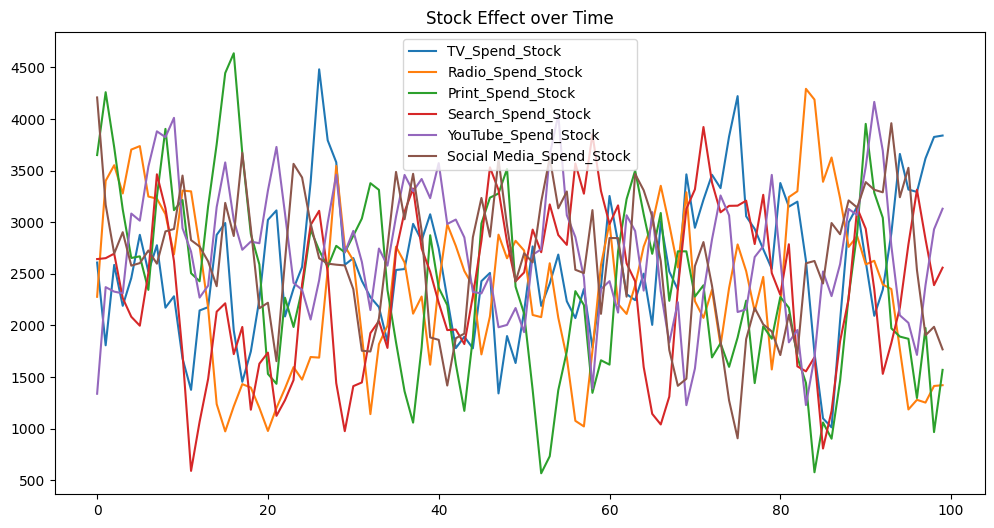

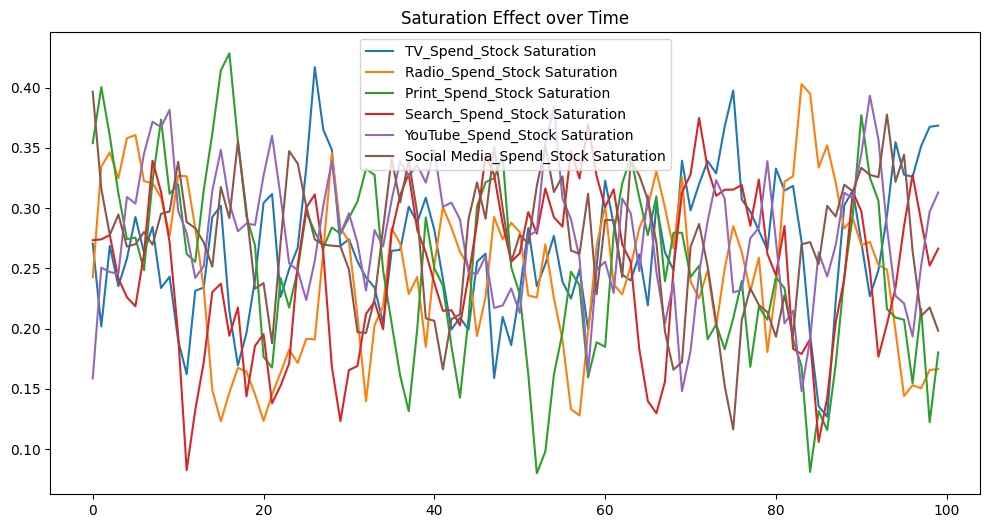

      TV_Spend  Radio_Spend  Print_Spend  Search_Spend  YouTube_Spend  \
0  2609.609889  2278.008116  3651.132177   2643.203788    1338.481398   
1  1006.244764  4525.052046  4869.219104   2661.036959    3404.376113   
2  4144.598576  3855.447420  2659.877716   2783.602463    2241.035472   
3  1001.203421  2457.309074  1314.862502    973.324251    2260.893672   
4  3686.197157  3979.334334  1771.911056   1919.789916    4430.609670   

   Social Media_Spend  TV_Spend_Stock  Radio_Spend_Stock  Print_Spend_Stock  \
0         4209.380702     2609.609889        2278.008116        3651.132177   
1         2129.664243     1807.927327        3401.530081        4260.175640   
2         1751.300157     2586.817743        3552.835861        3726.742999   
3         3524.472161     2190.414163        3278.954164        3123.772875   
4         2913.185478     2459.560980        3704.285719        2653.967594   

   Search_Spend_Stock  YouTube_Spend_Stock  Social Media_Spend_Stock  \
0         2643

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Apply Stock Effect (Lagged impact of past advertising)
def apply_stock_effect(df, spend_columns, window=4):
    for col in spend_columns:
        df[f'{col}_Stock'] = df[col].rolling(window=window, min_periods=1).mean()
    return df

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

def apply_saturation_effect(df, stock_columns):
    for col in stock_columns:
        df[f'{col}_Sat'] = df[col].apply(s_curve)
    return df

# Example Usage
spend_columns = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
df = pd.DataFrame({col: np.random.rand(100) * 5000 for col in spend_columns})

df = apply_stock_effect(df, spend_columns)
stock_columns = [f'{col}_Stock' for col in spend_columns]
df = apply_saturation_effect(df, stock_columns)

# Plot Stock Effect and Saturation Effect
plt.figure(figsize=(12, 6))
for col in stock_columns:
    plt.plot(df.index, df[col], label=f"{col}")
plt.title("Stock Effect over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for col in stock_columns:
    plt.plot(df.index, df[f'{col}_Sat'], label=f"{col} Saturation")
plt.title("Saturation Effect over Time")
plt.legend()
plt.show()

print(df.head())


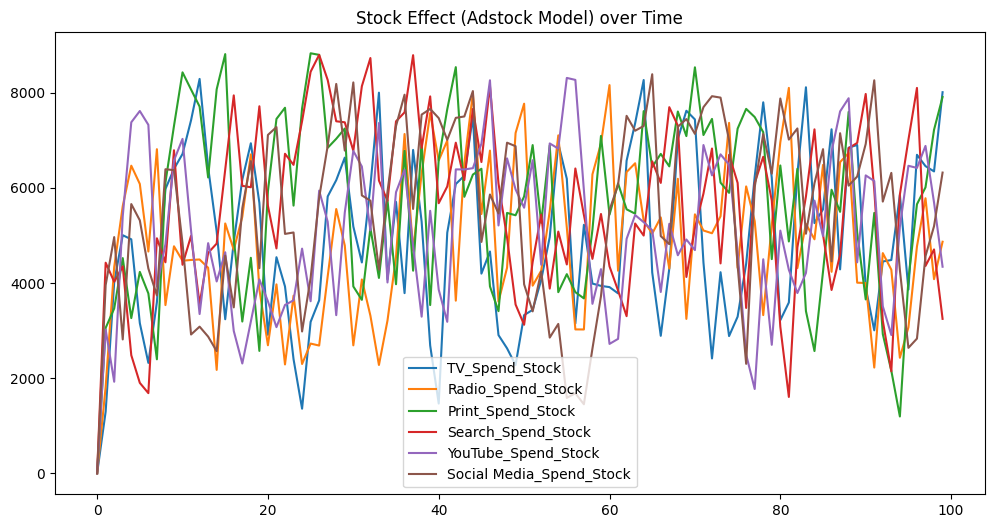

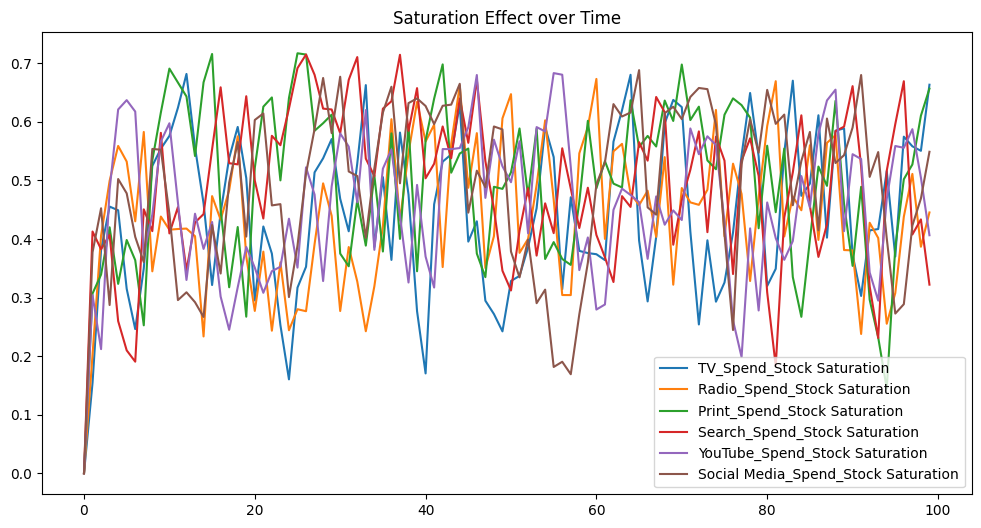

      TV_Spend  Radio_Spend  Print_Spend  Search_Spend  YouTube_Spend  \
0  3576.290760  1794.351167  2643.168861   2241.521913    3643.419477   
1  1296.170640  1817.921532  3056.108423   4426.367568    3018.953891   
2  3365.466277  3425.135000  1935.356074   1811.682380     414.730278   
3  2997.052069  3447.992399  2790.915575   2337.913775    4440.413175   
4  2415.816508  3657.461423  1000.595626    306.729389    4676.195534   

   Social Media_Spend  TV_Spend_Stock  Radio_Spend_Stock  Print_Spend_Stock  \
0         4367.659676        0.000000           0.000000           0.000000   
1         3955.978834     1296.170640        1817.921532        3056.108423   
2         2986.401212     4013.551598        4334.095767        3463.410285   
3          331.290010     5003.827868        5615.040283        4522.620717   
4         4251.900801     4917.730441        6464.981564        3261.905985   

   Search_Spend_Stock  YouTube_Spend_Stock  Social Media_Spend_Stock  \
0            0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adstock transformation function
def adstock(x, decay=0.5):
    result = np.zeros_like(x)
    for i in range(1, len(x)):
        result[i] = x[i] + decay * result[i - 1]
    return result

# Apply Stock Effect using Adstock Model
def apply_adstock_effect(df, spend_columns, decay=0.5):
    for col in spend_columns:
        df[f'{col}_Stock'] = adstock(df[col].values, decay)
    return df

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

def apply_saturation_effect(df, stock_columns):
    for col in stock_columns:
        df[f'{col}_Sat'] = df[col].apply(s_curve)
    return df

# Example Usage
spend_columns = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
df = pd.DataFrame({col: np.random.rand(100) * 5000 for col in spend_columns})

df = apply_adstock_effect(df, spend_columns)
stock_columns = [f'{col}_Stock' for col in spend_columns]
df = apply_saturation_effect(df, stock_columns)

# Plot Stock Effect and Saturation Effect
plt.figure(figsize=(12, 6))
for col in stock_columns:
    plt.plot(df.index, df[col], label=f"{col}")
plt.title("Stock Effect (Adstock Model) over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for col in stock_columns:
    plt.plot(df.index, df[f'{col}_Sat'], label=f"{col} Saturation")
plt.title("Saturation Effect over Time")
plt.legend()
plt.show()

print(df.head())


Optimized Budget for TV_Spend: $3000.00
Optimized Budget for Radio_Spend: $3000.00
Optimized Budget for Print_Spend: $3000.00
Optimized Budget for Search_Spend: $3000.00
Optimized Budget for YouTube_Spend: $4000.00
Optimized Budget for Social Media_Spend: $4000.00


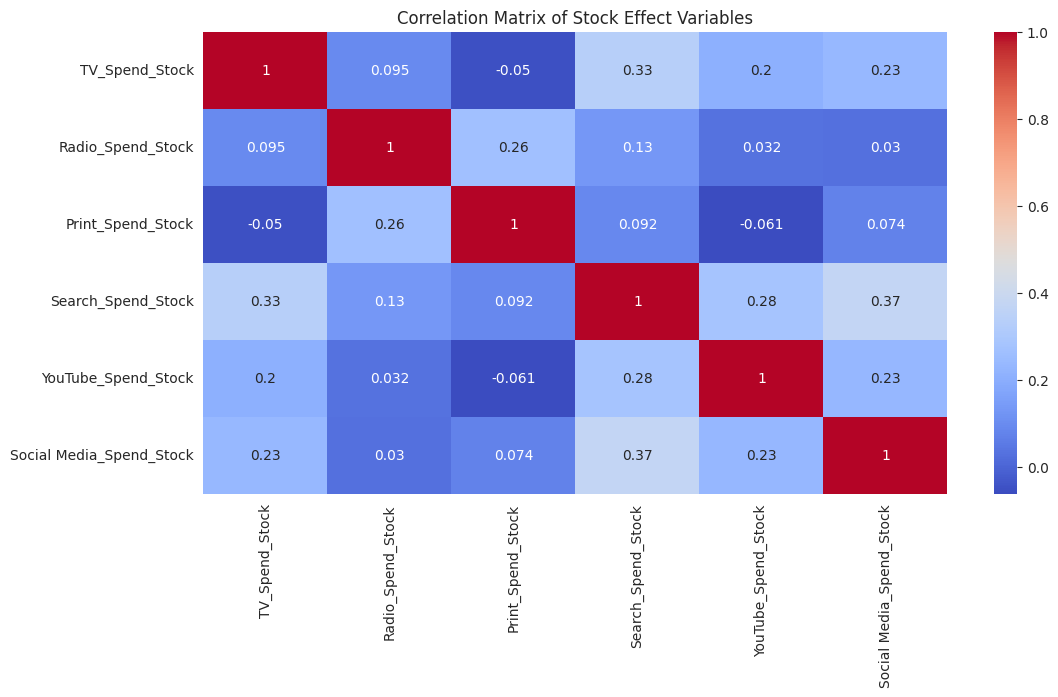

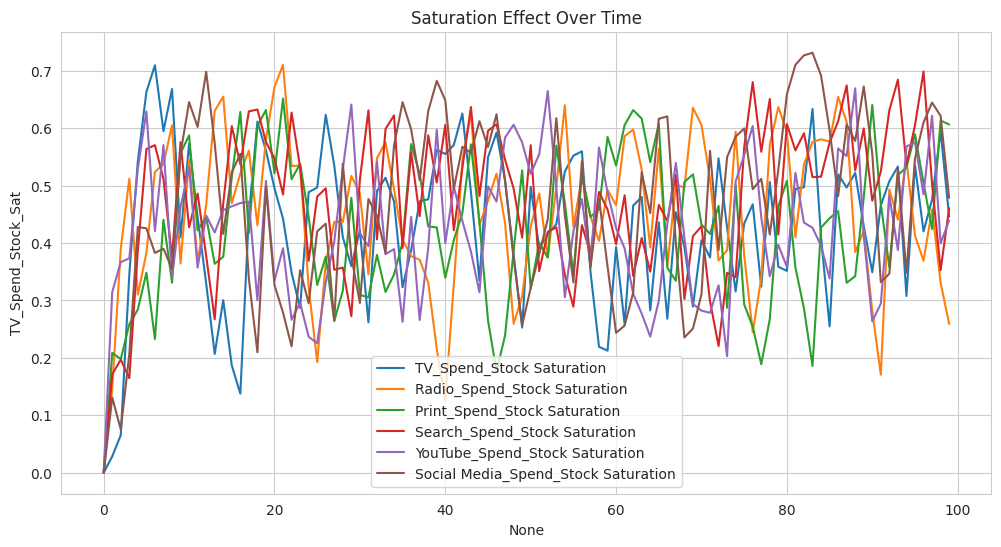

      TV_Spend  Radio_Spend  Print_Spend  Search_Spend  YouTube_Spend  \
0  2359.158891  4794.418653  2958.342428    720.962243     675.477688   
1   156.764718  1217.965644  1885.894787   1476.410956    3150.816064   
2   364.076550  3512.161175   823.346729   1016.819838    2243.622640   
3  3318.836190  3733.738343  1583.768092    525.281873    1993.411107   
4  4461.789520   197.311588  1543.636704   3389.367336    4087.043453   

   Social Media_Spend  TV_Spend_Stock  Radio_Spend_Stock  Print_Spend_Stock  \
0         3879.575877        0.000000           0.000000           0.000000   
1         1055.323967      156.764718        1217.965644        1885.894787   
2            1.926433      442.458909        4121.143998        1766.294123   
3         1596.116533     3540.065644        5794.310341        2466.915153   
4         3698.843754     6231.822342        3094.466758        2777.094281   

   Search_Spend_Stock  YouTube_Spend_Stock  Social Media_Spend_Stock  \
0            0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Adstock transformation function
def adstock(x, decay=0.5):
    result = np.zeros_like(x)
    for i in range(1, len(x)):
        result[i] = x[i] + decay * result[i - 1]
    return result

# Apply Stock Effect using Adstock Model
def apply_adstock_effect(df, spend_columns, decay=0.5):
    for col in spend_columns:
        df[f'{col}_Stock'] = adstock(df[col].values, decay)
    return df

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

def apply_saturation_effect(df, stock_columns):
    for col in stock_columns:
        df[f'{col}_Sat'] = df[col].apply(s_curve)
    return df

# Example Usage
spend_columns = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
df = pd.DataFrame({col: np.random.rand(100) * 5000 for col in spend_columns})

df = apply_adstock_effect(df, spend_columns)
stock_columns = [f'{col}_Stock' for col in spend_columns]
df = apply_saturation_effect(df, stock_columns)

# Budget Optimization Function
def optimize_budget(total_budget, initial_allocations, params):
    def constraint(x):
        return total_budget - np.sum(x)

    bounds = [(0, total_budget)] * len(initial_allocations)
    result = opt.minimize(
        lambda x: -np.sum([params[i] * s_curve(x[i]) for i in range(len(x))]),  # Maximize sales impact
        initial_allocations,
        bounds=bounds,
        constraints={'type': 'eq', 'fun': constraint}
    )
    return result.x

# Define parameters for optimization (effectiveness of each channel)
params = [3, 2.5, 2, 1.8, 2.2, 1.5]  # Example coefficients
initial_allocations = [3000, 3000, 3000, 3000, 4000, 4000]  # Initial budget allocation
optimized_allocations = optimize_budget(20000, initial_allocations, params)

# Print optimized budget allocation
for i, col in enumerate(spend_columns):
    print(f"Optimized Budget for {col}: ${optimized_allocations[i]:.2f}")

# Enhanced Visualization using Seaborn
sns.set_style("whitegrid")

# Heatmap for Stock Effect
plt.figure(figsize=(12, 6))
sns.heatmap(df[stock_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Stock Effect Variables")
plt.show()

# Line Plot for Saturation Effect
plt.figure(figsize=(12, 6))
for col in stock_columns:
    sns.lineplot(x=df.index, y=df[f'{col}_Sat'], label=f"{col} Saturation")
plt.title("Saturation Effect Over Time")
plt.legend()
plt.show()

print(df.head())

Optimized Budget for TV_Spend: $3000.00
Optimized Budget for Radio_Spend: $3000.00
Optimized Budget for Print_Spend: $3000.00
Optimized Budget for Search_Spend: $3000.00
Optimized Budget for YouTube_Spend: $4000.00
Optimized Budget for Social Media_Spend: $4000.00


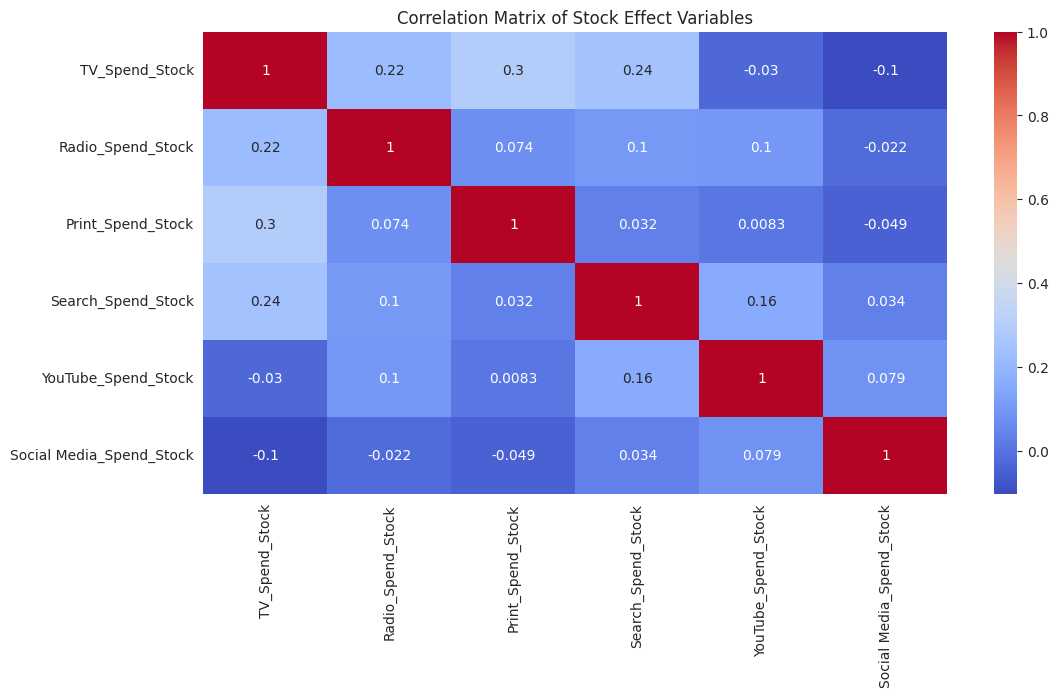

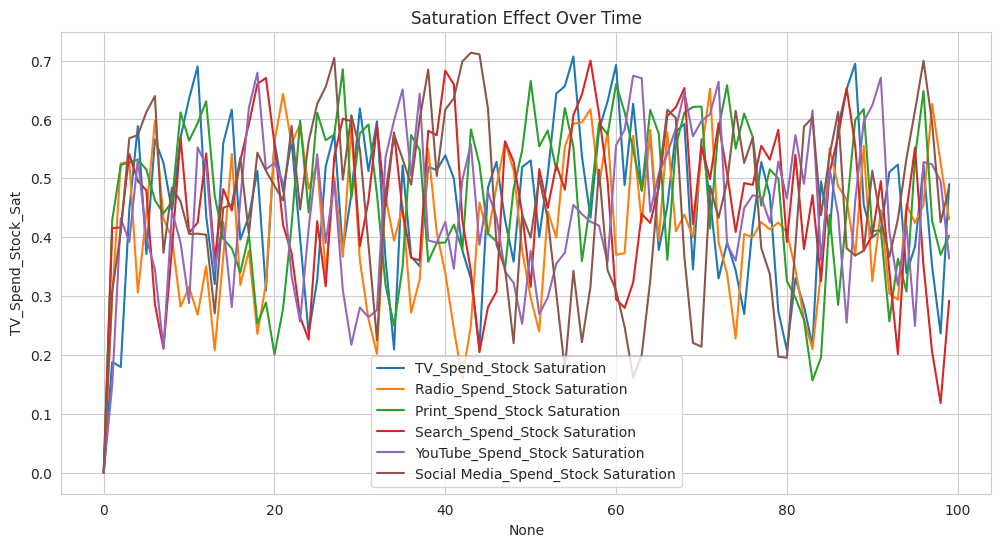

      TV_Spend  Radio_Spend  Print_Spend  Search_Spend  YouTube_Spend  \
0   107.998298  1875.073813  3747.962253   2355.256534    3921.488702   
1  1657.003816  2964.539355  4645.832430   4458.561706    1239.671958   
2   735.153086  4502.674925  3621.079486   2250.297597    4068.264678   
3  4103.004377  3026.930336  3036.597269   3968.114339    1804.699483   
4  4456.217364    34.039929  3067.898417   2453.936008    4008.427332   

   Social Media_Spend  TV_Spend_Stock  Radio_Spend_Stock  Print_Spend_Stock  \
0          400.640688        0.000000           0.000000           0.000000   
1         3082.284223     1657.003816        2964.539355        4645.832430   
2         2824.376451     1563.654994        5984.944602        5943.995701   
3         4414.543343     4884.831874        6019.402637        6008.595119   
4         3377.381918     6898.633301        3043.741247        6072.195977   

   Search_Spend_Stock  YouTube_Spend_Stock  Social Media_Spend_Stock  \
0            0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Adstock transformation function
def adstock(x, decay=0.5):
    result = np.zeros_like(x)
    for i in range(1, len(x)):
        result[i] = x[i] + decay * result[i - 1]
    return result

# Apply Stock Effect using Adstock Model
def apply_adstock_effect(df, spend_columns, decay=0.5):
    for col in spend_columns:
        df[f'{col}_Stock'] = adstock(df[col].values, decay)
    return df

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

def apply_saturation_effect(df, stock_columns):
    for col in stock_columns:
        df[f'{col}_Sat'] = df[col].apply(s_curve)
    return df

# Example Usage
spend_columns = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
df = pd.DataFrame({col: np.random.rand(100) * 5000 for col in spend_columns})

df = apply_adstock_effect(df, spend_columns)
stock_columns = [f'{col}_Stock' for col in spend_columns]
df = apply_saturation_effect(df, stock_columns)

# Budget Optimization Function
def optimize_budget(total_budget, initial_allocations, params):
    def constraint(x):
        return total_budget - np.sum(x)

    bounds = [(0, total_budget)] * len(initial_allocations)
    result = opt.minimize(
        lambda x: -np.sum([params[i] * s_curve(x[i]) for i in range(len(x))]),  # Maximize sales impact
        initial_allocations,
        bounds=bounds,
        constraints={'type': 'eq', 'fun': constraint}
    )
    return result.x

# Define parameters for optimization (effectiveness of each channel)
params = [3, 2.5, 2, 1.8, 2.2, 1.5]  # Example coefficients
initial_allocations = [3000, 3000, 3000, 3000, 4000, 4000]  # Initial budget allocation
optimized_allocations = optimize_budget(20000, initial_allocations, params)

# Print optimized budget allocation
for i, col in enumerate(spend_columns):
    print(f"Optimized Budget for {col}: ${optimized_allocations[i]:.2f}")

# Enhanced Visualization using Seaborn
sns.set_style("whitegrid")

# Heatmap for Stock Effect
plt.figure(figsize=(12, 6))
sns.heatmap(df[stock_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Stock Effect Variables")
plt.show()

# Line Plot for Saturation Effect
plt.figure(figsize=(12, 6))
for col in stock_columns:
    sns.lineplot(x=df.index, y=df[f'{col}_Sat'], label=f"{col} Saturation")
plt.title("Saturation Effect Over Time")
plt.legend()
plt.show()

print(df.head())
